### **K-En Yakın Komşu (K-Nearest Neighbors)**

* Gözlemlerin birbirine olan benzerliklerinin üzerinden tahmin yapılır. 

* Öklid ya da benzeri bir uzaklık hesabı ile her bir gözlemin diğer gözlemlere olan uzaklıkları hesaplanır. 

* K-En Yakın Komşu hem regresyon hem sınıflandırma problemleri için kullanılır.

#### ⭐ **K-En Yakın Komşu <u>Regresyon</u>**

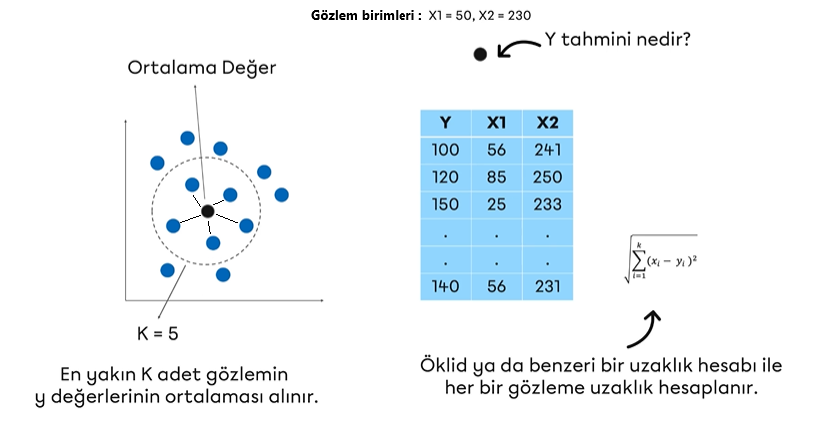

#### ⭐ **K-En Yakın Komşu <u>Sınıflandırma</u>**

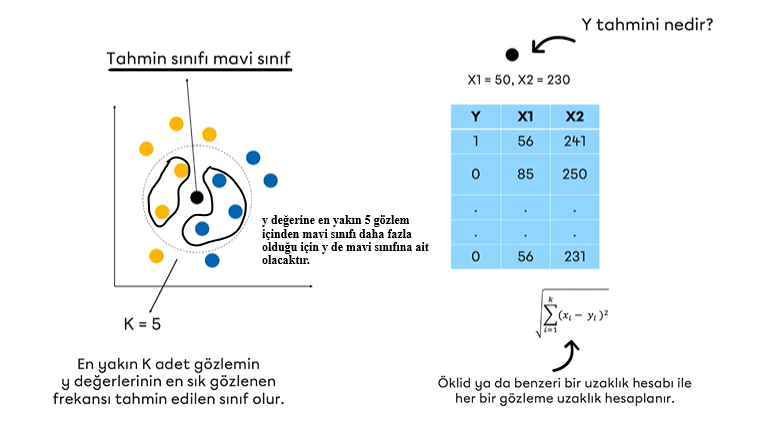

## **UYGULAMA**

### **Lojistik Regresyon ile Diyabet Tahmini**
#### **İş Problemi :**

* Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin edebilecek bir makine öğrenmesi modeli geliştirebilir misiniz?

* Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir. 

* 768 gözlem ve 8 sayısal bağımsız değişkenden oluşmaktadır. Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

**Değişkenler**

* **Pregnancies:** Hamilelik sayısı

* **Glucose:** Glikoz

* **BloodPressure:** Kan basıncı

* **SkinThickness:** Cilt Kalınlığı

* **Insulin:** İnsülin.

* **BMI:** Beden kitle indeksi

* **DiabetesPedigreeFunction:** Soyumuzdaki kişilere göre diyabet olma ihtimalimizi hesaplayan bir fonksiyon

* **Age:** Yaş (yıl)

* **Outcome:** Kişinin diyabet olup olmadığı bilgisi. Hastalığa sahip (1) ya da değil (0)

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DSMLBC10/week_11 (08.12.22-14.12.22)/dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


0    500
1    268
Name: Outcome, dtype: int64


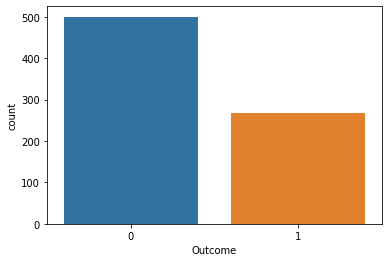

In [ ]:
print(df["Outcome"].value_counts())

sns.countplot(x="Outcome", data=df)
plt.show()

* Glucose, BloodPressure, SkinThickness, Insulin ve BMI değerlerinin 0 olması anlamsızdır. Dolayısıyla karar alırken bunu göze alarak inceleme yapılmalıdır.

🔆 **Veri Ön İşleme (Data Pre-Processing)**

In [ ]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)

* Uzaklık tabanlı ve gradient descent tabanlı yöntemlerde değişkenlerin standart olması elde edilecek sonuçların ya daha hızlı ya da daha başarılı olmasını sağlayacaktır.  

* Bu aşamada bağımsız değişkenler standartlaştırılır.

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

* X_scaled çalıştırıldığında bir numpy array dönüyor ve değişken değerleri standartlaştırılmış olsa da elimizdeki numpy array istediğimiz bilgileri taşımıyor,sütun isimleri yok. Dolayısıyla sütun isimlerini ekliyoruz.

In [ ]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


🔆 **Modeling & Prediction**

In [ ]:
knn_model = KNeighborsClassifier().fit(X, y)
random_user = X.sample(1, random_state=45)  #aynı kullanıcı bilgilerine ulaşmak için 45 girilmiştir.
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
195,0.342981,1.161295,0.770014,1.283638,1.130518,0.940144,-0.232176,-0.360847


In [ ]:
knn_model.predict(random_user)

array([1])

🔆 **Model Evaluation**

In [ ]:
# Confusion matrix için y_pred:
y_pred = knn_model.predict(X)

In [ ]:
# AUC için y_prob:
y_prob = knn_model.predict_proba(X)[:, 1]

In [ ]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



* Accuracy : 0.83 demek 100 kişide 83'ü doğru tahmin edilmiştir şeklinde yorumlanır.

* Eğer dengesiz veri seti problemi varsa Accuracy doğru bir değer çıkmayacaktır. Başka metrikler incelenmelidir.

* **macro avg :** aritmetik ortalama değeri,

* **weighted avg :** ağırlıklı ortalama değeridir.

In [ ]:
roc_auc_score(y, y_prob)

0.9017686567164179

**Validation**

* acc : 0.83
* auc: 0.90
* f1 score : 0.74

In [ ]:
cv_results = cross_validate(knn_model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc"])
cv_results

{'fit_time': array([0.00579762, 0.00493646, 0.00274587, 0.0035274 , 0.00297832]),
 'score_time': array([0.01804566, 0.01473188, 0.02328467, 0.01800585, 0.01306462]),
 'test_accuracy': array([0.72077922, 0.73376623, 0.71428571, 0.77124183, 0.7254902 ]),
 'test_f1': array([0.58252427, 0.60952381, 0.54166667, 0.63917526, 0.58      ]),
 'test_roc_auc': array([0.77555556, 0.78759259, 0.73194444, 0.83226415, 0.77528302])}

In [ ]:
cv_results['test_accuracy'].mean()

0.733112638994992

In [ ]:
cv_results['test_f1'].mean()

0.5905780011534191

In [ ]:
cv_results['test_roc_auc'].mean()

0.7805279524807827

❗ **Yukarıda çıkan sonuçlar nasıl değerlendirilmelidir ?** 

* Model kurulan veride model performansı değerlendirilmeye çalıştığında yüksek değerler elde edildi.
* Yanlılık oluşur.
* Sonuçların yorumlanmasında yanlışlıklara sebep olur. 
* Modelin hiç görmediği test verisiyle tahmin yapıldığında ise değerler düştü, fakat sonuçlar daha doğru şekilde yorumlanır. O yüzden cross-validate önemlidir.

❗ **Başarı Score'ları Nasıl Arttırılabilir ?**

**1.** Örnek (Gözlem) boyutu arttırılabilir.

**2.** Veri ön işleme

**3.** Özellik mühendisliği

**4.** İlgili algoritma için optimizasyonlar yapılabilir.

In [ ]:
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

🔆 **Hyperparameter Optimization**

* **parametre :** Modellerin veri içinden öğrendiği ağırlıklardır.

* **hiperparametre :** Kullanıcı tarafından tanımlanması gereken dışsal ve veri seti içinden öğrenilmeyen parametrelere denir. 

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}

knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,  
                           verbose=1).fit(X, y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


* Kullanıcı tarafından girilmesi gereken parametreleri en optimal şekilde ayarlanmalıdır. 

* Ön tanımlı değer n_neighbors için 5'tir.

* En optimum hatayı veren komşuluk sayısını (n_neighbors) bulmak için GridSearchCV kullanılır.

*  n_jobs=-1 işlemciyi olası en yüksek performans ile kullanmak için girilmesi gereken değerdir

* verbose=1 rapor verilmesi isteniyorsa 1 değeri girilir. 


In [ ]:
knn_gs_best.best_params_

{'n_neighbors': 17}

* n_neighbors ön tanımlı değeri 5'ti. Bu model için 17 en iyisi olarak çıktı. Bunun üzerinden final model kurulursa, model performansının artması beklenir. 

🔆 **Final Model** 🔆

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

* **knn_gs_best.best_params_ ifadesi el ile bilgi girmemek için kullanılır. Otomatik bilgiyi getirir. 

In [ ]:
cv_results['test_accuracy'].mean()

0.7669892199303965

In [ ]:
cv_results['test_f1'].mean()

0.6170909049720137

In [ ]:
cv_results['test_roc_auc'].mean()

0.8127938504542278

* Komşuluk optimize edildiğinde, accuracy, f1 ve roc score'ları arttı.

In [ ]:
random_user = X.sample(1)
random_user

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
425,0.046014,1.975021,0.459827,1.158182,1.712272,0.635538,-0.627811,-0.190672


In [ ]:
knn_final.predict(random_user)

array([1])

* Dışarıdan rasgele bir kullanıcı girildiğinde, diyabetli çıktı.